In [199]:
import pandas as pd
import datetime
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt



In [200]:
df_baniola=pd.read_csv('../data/baniola.csv')
df_automobile=pd.read_csv('automobile_data.csv')

In [201]:
print(df_baniola.head())
print('--------------------------------------------------------------------')
print(df_automobile.head())
print('--------------------------------------------------------------------')

     Marque   Modèle    year        road     boite horsepower     fuel  \
0   Hyundai      I10  2015.0  180 000 KM  Manuelle       5 CV  Essence   
1    Suzuki   Autres  2020.0   90 000 KM  Manuelle       5 CV  Essence   
2    Suzuki   Autres  2020.0   88 000 KM  Manuelle       5 CV  Essence   
3  Mahindra  KUV 100  2022.0   10 300 KM  Manuelle       5 CV   Diesel   
4   Peugeot      308  2015.0  180 000 KM  Manuelle       5 CV  Essence   

   nbre_portes cylindrée   Prix  
0            5       NaN  28000  
1            5       3 L  35800  
2            5       3 L  36500  
3            4       3 L      0  
4            5       3 L  32000  
--------------------------------------------------------------------
          Marque             Modèle  year        road        boite horsepower  \
0  Mercedes-Benz           Classe E  2024        0 km  Automatique      10 cv   
1        Peugeot               2008  2014  162 000 km     Manuelle       5 cv   
2          Mazda                  6  20

In [202]:
# ajuster le feature 'cylindée' de df_automobile pour qu'il soit de type int:
df_automobile['cylindrée'] = df_automobile['cylindrée'].astype(float)/1000
# print(df_automobile.head())
df_baniola['cylindrée'] = df_baniola['cylindrée'].apply(lambda x: re.search(r'\d+', x).group() if pd.notnull(x) else x)
# print(df_baniola.head())

In [203]:
# on va supprimer le feature "transmission" de df_automobile car il n'existe pas dans df_baniola
df_automobile.drop('transmission', axis=1, inplace=True)

In [204]:
print(df_baniola.head())
print('--------------------------------------------------------------------')
print(df_automobile.head())

     Marque   Modèle    year        road     boite horsepower     fuel  \
0   Hyundai      I10  2015.0  180 000 KM  Manuelle       5 CV  Essence   
1    Suzuki   Autres  2020.0   90 000 KM  Manuelle       5 CV  Essence   
2    Suzuki   Autres  2020.0   88 000 KM  Manuelle       5 CV  Essence   
3  Mahindra  KUV 100  2022.0   10 300 KM  Manuelle       5 CV   Diesel   
4   Peugeot      308  2015.0  180 000 KM  Manuelle       5 CV  Essence   

   nbre_portes cylindrée   Prix  
0            5       NaN  28000  
1            5         3  35800  
2            5         3  36500  
3            4         3      0  
4            5         3  32000  
--------------------------------------------------------------------
          Marque             Modèle  year        road        boite horsepower  \
0  Mercedes-Benz           Classe E  2024        0 km  Automatique      10 cv   
1        Peugeot               2008  2014  162 000 km     Manuelle       5 cv   
2          Mazda                  6  20

In [205]:
# df_baniola['year'] = df_baniola['year'].str.extract(r'(\d+)')[0].astype(int)


In [206]:
# ajuster le prix :
df_automobile['Prix'] = df_automobile['Prix'].str.replace(' ', '')
# print(df_automobile.head())
df_automobile['Prix'] = df_automobile['Prix'].str.extract(r'(\d[\d\s]*)')[0].str.replace(' ', '').astype(int) 

In [207]:
# fusionner les 2 dataframes:
df = pd.concat([df_automobile, df_baniola], ignore_index=True)
print(df.shape)


(40199, 10)


In [208]:
print(df)

              Marque             Modèle    year        road        boite  \
0      Mercedes-Benz           Classe E  2024.0        0 km  Automatique   
1            Peugeot               2008  2014.0  162 000 km     Manuelle   
2              Mazda                  6  2013.0  256 000 km  Automatique   
3               Ford  Ecosport Titanium  2022.0   60 000 km     Manuelle   
4             Toyota         C-HR Sport  2020.0  162 000 km  Automatique   
...              ...                ...     ...         ...          ...   
40194        Peugeot                508  2012.0  280 000 KM     Manuelle   
40195           Audi                 A4  2018.0  114 000 KM  Automatique   
40196        Renault             Koleos  2014.0   96 000 KM     Manuelle   
40197       Mahindra              AUTRE  2022.0   10 500 KM     Manuelle   
40198           Fiat      PALIO WEEKEND  2001.0  300 000 KM     Manuelle   

      horsepower     fuel  nbre_portes cylindrée    Prix  
0          10 cv  Essence   

In [209]:
#  ajuster le kilometrage:*
print(df['road'].dtype)

# Remove ' km' and convert to float
df['road'] = df['road'].str.replace('km', '')
df['road'] = df['road'].str.replace('KM', '')
print(df)
print(df['road'].dtype)
print(df)



object
              Marque             Modèle    year      road        boite  \
0      Mercedes-Benz           Classe E  2024.0        0   Automatique   
1            Peugeot               2008  2014.0  162 000      Manuelle   
2              Mazda                  6  2013.0  256 000   Automatique   
3               Ford  Ecosport Titanium  2022.0   60 000      Manuelle   
4             Toyota         C-HR Sport  2020.0  162 000   Automatique   
...              ...                ...     ...       ...          ...   
40194        Peugeot                508  2012.0  280 000      Manuelle   
40195           Audi                 A4  2018.0  114 000   Automatique   
40196        Renault             Koleos  2014.0   96 000      Manuelle   
40197       Mahindra              AUTRE  2022.0   10 500      Manuelle   
40198           Fiat      PALIO WEEKEND  2001.0  300 000      Manuelle   

      horsepower     fuel  nbre_portes cylindrée    Prix  
0          10 cv  Essence          4.0       

In [210]:
# #  ajuster horsepower:*
print(df['horsepower'].dtype)
df['horsepower'] = df['horsepower'].str.replace('cv', '')
df['horsepower'] = df['horsepower'].str.replace('CV', '')
df['horsepower'] = df['horsepower'].str.replace(' ', '')

print(df)


object
              Marque             Modèle    year      road        boite  \
0      Mercedes-Benz           Classe E  2024.0        0   Automatique   
1            Peugeot               2008  2014.0  162 000      Manuelle   
2              Mazda                  6  2013.0  256 000   Automatique   
3               Ford  Ecosport Titanium  2022.0   60 000      Manuelle   
4             Toyota         C-HR Sport  2020.0  162 000   Automatique   
...              ...                ...     ...       ...          ...   
40194        Peugeot                508  2012.0  280 000      Manuelle   
40195           Audi                 A4  2018.0  114 000   Automatique   
40196        Renault             Koleos  2014.0   96 000      Manuelle   
40197       Mahindra              AUTRE  2022.0   10 500      Manuelle   
40198           Fiat      PALIO WEEKEND  2001.0  300 000      Manuelle   

      horsepower     fuel  nbre_portes cylindrée    Prix  
0             10  Essence          4.0       

In [211]:
# drop duplicates:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)



37073


In [212]:
# renomer la colonne road en "kilometrage"
df.rename(columns={'road':'kilometrage'}, inplace=True)
print(df)

              Marque             Modèle    year kilometrage        boite  \
0      Mercedes-Benz           Classe E  2024.0          0   Automatique   
1            Peugeot               2008  2014.0    162 000      Manuelle   
2              Mazda                  6  2013.0    256 000   Automatique   
3               Ford  Ecosport Titanium  2022.0     60 000      Manuelle   
4             Toyota         C-HR Sport  2020.0    162 000   Automatique   
...              ...                ...     ...         ...          ...   
40194        Peugeot                508  2012.0    280 000      Manuelle   
40195           Audi                 A4  2018.0    114 000   Automatique   
40196        Renault             Koleos  2014.0     96 000      Manuelle   
40197       Mahindra              AUTRE  2022.0     10 500      Manuelle   
40198           Fiat      PALIO WEEKEND  2001.0    300 000      Manuelle   

      horsepower     fuel  nbre_portes cylindrée    Prix  
0             10  Essence   

In [213]:
# unifier le feature cylindree : eliminer la lettre "L" et convertir à la meme unite 
df['kilometrage'] = df['kilometrage'].str.replace(' ', '')
print(df)


              Marque             Modèle    year kilometrage        boite  \
0      Mercedes-Benz           Classe E  2024.0           0  Automatique   
1            Peugeot               2008  2014.0      162000     Manuelle   
2              Mazda                  6  2013.0      256000  Automatique   
3               Ford  Ecosport Titanium  2022.0       60000     Manuelle   
4             Toyota         C-HR Sport  2020.0      162000  Automatique   
...              ...                ...     ...         ...          ...   
40194        Peugeot                508  2012.0      280000     Manuelle   
40195           Audi                 A4  2018.0      114000  Automatique   
40196        Renault             Koleos  2014.0       96000     Manuelle   
40197       Mahindra              AUTRE  2022.0       10500     Manuelle   
40198           Fiat      PALIO WEEKEND  2001.0      300000     Manuelle   

      horsepower     fuel  nbre_portes cylindrée    Prix  
0             10  Essence   

In [214]:
print(df.shape)
print(df.isnull().sum())

(3126, 10)
Marque          71
Modèle          95
year            25
kilometrage     62
boite            0
horsepower      24
fuel             4
nbre_portes     31
cylindrée      912
Prix             0
dtype: int64


In [215]:
# save to csv :
df.to_csv('final_data.csv', index=False)


In [216]:
# gestion des valeurs manquantes:

df= df.dropna(subset=['fuel'])#supprimer les valeurs manquantes dans la colonne fuel car elles sont tres peu.
df= df.dropna(subset=['horsepower'])#supprimer les valeurs manquantes dans la colonne cylindrée car elles sont tres peu.
df= df.dropna(subset=['year'])#supprimer les valeurs manquantes dans la colonne year car elles sont tres peu.
df['nbre_portes'] = df['nbre_portes'].fillna(4)#remplir les valeurs manquantes par la valeur la plus frequentes



# df = df.dropna(subset=['cylindrée']) #on va les supprimer pour le moment mais on va tester le modele dans les 2 cas : avec moy de la colonne et avec dropna.
# df['cylindrée'] = df.groupby('Marque')['cylindrée'].transform(lambda x: x.fillna(x.median()))# remplacer par la mediane de la colonne cylindree pour chaque marque puisque le nombre est important donc on ne doit pas supprimer , de plus il depend de la marque .
print(df.shape)

print(df.isnull().sum())


(3082, 10)
Marque          64
Modèle          88
year             0
kilometrage     47
boite            0
horsepower       0
fuel             0
nbre_portes      0
cylindrée      871
Prix             0
dtype: int64


In [217]:
#  gerer les valeurs manquantes de la colonne kilometrage:selon l'age :
print(df[df['kilometrage']==0])
df.reset_index()
print(df.iloc[1329])
print(df[df['year']==2016])
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']

df['kilometrage'] = pd.to_numeric(df['kilometrage'], errors='coerce')# convertir en float  

age_to_km = df.groupby('age')['kilometrage'].median()

df['kilometrage'] = df.apply(lambda row: age_to_km[row['age']] if pd.isna(row['kilometrage']) else row['kilometrage'],axis=1)

df['kilometrage'] = df['kilometrage'].fillna(df['kilometrage'].median())
df.loc[(df['kilometrage'] == 0) & (df['year'] != 2024), 'kilometrage'] = df['kilometrage'].median()


df.drop('age', axis=1, inplace=True)


Empty DataFrame
Columns: [Marque, Modèle, year, kilometrage, boite, horsepower, fuel, nbre_portes, cylindrée, Prix]
Index: []
Marque            Honda
Modèle            AUTRE
year             2016.0
kilometrage      120000
boite          Manuelle
horsepower            5
fuel            Essence
nbre_portes         5.0
cylindrée             3
Prix              30000
Name: 1482, dtype: object
           Marque                              Modèle    year kilometrage  \
22            BMW                             X1 1.6L  2016.0      126000   
27           Ford                               Focus  2016.0      149000   
34           Land  Rover Range Rover Evoque R-Dynamic  2016.0      150000   
50     Volkswagen                          Golf 7 GTI  2016.0       75000   
51      Ssangyong                 Tivoli Confort Plus  2016.0      127000   
...           ...                                 ...     ...         ...   
38223         NaN                                 NaN  2016.0      10

In [218]:
print(df[df['kilometrage']==0])

             Marque              Modèle    year  kilometrage        boite  \
0     Mercedes-Benz            Classe E  2024.0          0.0  Automatique   
78            Chery         Tiggo 7 Pro  2024.0          0.0  Automatique   
398             BMW           X2 Lounge  2024.0          0.0  Automatique   
413   Mercedes-Benz        Classe E AMG  2024.0          0.0  Automatique   
421   Mercedes-Benz        Classe E AMG  2024.0          0.0  Automatique   
422   Mercedes-Benz       GLC Coupé AMG  2024.0          0.0  Automatique   
841          Suzuki             Celerio  2024.0          0.0     Manuelle   
937         Hyundai              Tucson  2024.0          0.0  Automatique   
938      Volkswagen              Tiguan  2024.0          0.0  Automatique   
941   Mercedes-Benz           GLC Coupé  2024.0          0.0  Automatique   
980   Mercedes-Benz           GLC Coupé  2024.0          0.0  Automatique   
1099  Mercedes-Benz      Classe C AMG +  2024.0          0.0  Automatique   

In [219]:
print(df['year'].size)
print(df.isnull().sum())


3082
Marque          64
Modèle          88
year             0
kilometrage      0
boite            0
horsepower       0
fuel             0
nbre_portes      0
cylindrée      871
Prix             0
dtype: int64


In [220]:
# ajuster les types des colonnes:
df['nbre_portes'] = pd.to_numeric(df['nbre_portes'], errors='coerce').astype('Int64')

df['horsepower'] = df['horsepower'].str.extract(r'(\d[\d\s]*)')[0].str.replace(' ', '').astype(int)
df['cylindrée'] = df['cylindrée'].astype(float) 
# df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year.astype('Int64') # convertir en int

print(df.dtypes)
print(df[df['kilometrage']==0])

Marque          object
Modèle          object
year           float64
kilometrage    float64
boite           object
horsepower       int32
fuel            object
nbre_portes      Int64
cylindrée      float64
Prix             int64
dtype: object
             Marque              Modèle    year  kilometrage        boite  \
0     Mercedes-Benz            Classe E  2024.0          0.0  Automatique   
78            Chery         Tiggo 7 Pro  2024.0          0.0  Automatique   
398             BMW           X2 Lounge  2024.0          0.0  Automatique   
413   Mercedes-Benz        Classe E AMG  2024.0          0.0  Automatique   
421   Mercedes-Benz        Classe E AMG  2024.0          0.0  Automatique   
422   Mercedes-Benz       GLC Coupé AMG  2024.0          0.0  Automatique   
841          Suzuki             Celerio  2024.0          0.0     Manuelle   
937         Hyundai              Tucson  2024.0          0.0  Automatique   
938      Volkswagen              Tiguan  2024.0          0.0  A

In [221]:
print(df)

              Marque             Modèle    year  kilometrage        boite  \
0      Mercedes-Benz           Classe E  2024.0          0.0  Automatique   
1            Peugeot               2008  2014.0     162000.0     Manuelle   
2              Mazda                  6  2013.0     256000.0  Automatique   
3               Ford  Ecosport Titanium  2022.0      60000.0     Manuelle   
4             Toyota         C-HR Sport  2020.0     162000.0  Automatique   
...              ...                ...     ...          ...          ...   
40194        Peugeot                508  2012.0     280000.0     Manuelle   
40195           Audi                 A4  2018.0     114000.0  Automatique   
40196        Renault             Koleos  2014.0      96000.0     Manuelle   
40197       Mahindra              AUTRE  2022.0      10500.0     Manuelle   
40198           Fiat      PALIO WEEKEND  2001.0     300000.0     Manuelle   

       horsepower     fuel  nbre_portes  cylindrée    Prix  
0             

In [222]:
# encoder les valeurs de la colonne de type string en type int:
label_encoder = LabelEncoder()
print(df['boite'].unique())
print(df['fuel'].unique())
# print(df)


['Automatique' 'Manuelle']
['Essence' 'Diesel' 'Hybride' 'Electrique']


In [223]:
print(df[df['fuel']=='Electrique'])

           Marque  Modèle    year  kilometrage        boite  horsepower  \
1682   Volkswagen  Golf 8  2021.0      55000.0  Automatique           8   
21474        Fiat   AUTRE  2015.0          6.0     Manuelle           4   

             fuel  nbre_portes  cylindrée  Prix  
1682   Electrique            5        5.0  1234  
21474  Electrique            4        NaN    50  


In [224]:
# df.dropna(inplace=True)
print(df)

              Marque             Modèle    year  kilometrage        boite  \
0      Mercedes-Benz           Classe E  2024.0          0.0  Automatique   
1            Peugeot               2008  2014.0     162000.0     Manuelle   
2              Mazda                  6  2013.0     256000.0  Automatique   
3               Ford  Ecosport Titanium  2022.0      60000.0     Manuelle   
4             Toyota         C-HR Sport  2020.0     162000.0  Automatique   
...              ...                ...     ...          ...          ...   
40194        Peugeot                508  2012.0     280000.0     Manuelle   
40195           Audi                 A4  2018.0     114000.0  Automatique   
40196        Renault             Koleos  2014.0      96000.0     Manuelle   
40197       Mahindra              AUTRE  2022.0      10500.0     Manuelle   
40198           Fiat      PALIO WEEKEND  2001.0     300000.0     Manuelle   

       horsepower     fuel  nbre_portes  cylindrée    Prix  
0             

In [225]:
df['boite'] = df['boite'].replace({'Automatique': 1, 'Manuelle': 0})
print(df)

              Marque             Modèle    year  kilometrage  boite  \
0      Mercedes-Benz           Classe E  2024.0          0.0      1   
1            Peugeot               2008  2014.0     162000.0      0   
2              Mazda                  6  2013.0     256000.0      1   
3               Ford  Ecosport Titanium  2022.0      60000.0      0   
4             Toyota         C-HR Sport  2020.0     162000.0      1   
...              ...                ...     ...          ...    ...   
40194        Peugeot                508  2012.0     280000.0      0   
40195           Audi                 A4  2018.0     114000.0      1   
40196        Renault             Koleos  2014.0      96000.0      0   
40197       Mahindra              AUTRE  2022.0      10500.0      0   
40198           Fiat      PALIO WEEKEND  2001.0     300000.0      0   

       horsepower     fuel  nbre_portes  cylindrée    Prix  
0              10  Essence            4      1.400  430000  
1               5  Essenc

In [226]:
print(df[df['cylindrée'].isna()])
print(df.iloc[18])

              Marque           Modèle    year  kilometrage  boite  horsepower  \
18              Ford       Fusion 1.6  2017.0      90000.0      0           9   
23               BMW       X2 S drive  2020.0      74000.0      1           8   
74     Mercedes-Benz  CLA Kit Amg 200  2020.0     150000.0      0           9   
102           Nissan       Juke Tekna  2021.0      53000.0      1           6   
196    Mercedes-Benz    GLC Coupé AMG  2017.0     190000.0      1           9   
...              ...              ...     ...          ...    ...         ...   
40194        Peugeot              508  2012.0     280000.0      0           9   
40195           Audi               A4  2018.0     114000.0      1           8   
40196        Renault           Koleos  2014.0      96000.0      0           8   
40197       Mahindra            AUTRE  2022.0      10500.0      0           5   
40198           Fiat    PALIO WEEKEND  2001.0     300000.0      0           4   

          fuel  nbre_portes

In [227]:
print(df['fuel'].unique())
df['essence'] = df['fuel']=='Essence'
df['diesel'] = df['fuel']=='Diesel'
df['electrique'] = df['fuel']=='Electrique'
df['hybride'] = df['fuel']=='Hybride'
df.drop('fuel', axis=1, inplace=True)
df['essence'] = df['essence'].astype(int)
df['diesel'] = df['diesel'].astype(int)
df['electrique'] = df['electrique'].astype(int)
df['hybride'] = df['hybride'].astype(int)

print(df)


['Essence' 'Diesel' 'Hybride' 'Electrique']
              Marque             Modèle    year  kilometrage  boite  \
0      Mercedes-Benz           Classe E  2024.0          0.0      1   
1            Peugeot               2008  2014.0     162000.0      0   
2              Mazda                  6  2013.0     256000.0      1   
3               Ford  Ecosport Titanium  2022.0      60000.0      0   
4             Toyota         C-HR Sport  2020.0     162000.0      1   
...              ...                ...     ...          ...    ...   
40194        Peugeot                508  2012.0     280000.0      0   
40195           Audi                 A4  2018.0     114000.0      1   
40196        Renault             Koleos  2014.0      96000.0      0   
40197       Mahindra              AUTRE  2022.0      10500.0      0   
40198           Fiat      PALIO WEEKEND  2001.0     300000.0      0   

       horsepower  nbre_portes  cylindrée    Prix  essence  diesel  \
0              10            4   

In [228]:
# df.reset_index(drop=True, inplace=True)
# print(df)
print(df[df['kilometrage']==0].shape)
print(df[df['electrique']==1])

(13, 13)
           Marque  Modèle    year  kilometrage  boite  horsepower  \
1682   Volkswagen  Golf 8  2021.0      55000.0      1           8   
21474        Fiat   AUTRE  2015.0          6.0      0           4   

       nbre_portes  cylindrée  Prix  essence  diesel  electrique  hybride  
1682             5        5.0  1234        0       0           1        0  
21474            4        NaN    50        0       0           1        0  


In [229]:
# encodage de la colonne 'Marque': freq encoding en pourcentage:
freq_encoding = df['Marque'].value_counts(normalize=True)*100
df['Marque'] = df['Marque'].map(freq_encoding)
df['Marque'] = df['Marque'].fillna(df['Marque'].median())
# df['Marque'] = label_encoder.fit_transform(df['Marque'])

print(df)


          Marque             Modèle    year  kilometrage  boite  horsepower  \
0       7.024520           Classe E  2024.0          0.0      1          10   
1      10.470510               2008  2014.0     162000.0      0           5   
2       1.424785                  6  2013.0     256000.0      1           9   
3       4.241219  Ecosport Titanium  2022.0      60000.0      0           7   
4       2.485089         C-HR Sport  2020.0     162000.0      1           6   
...          ...                ...     ...          ...    ...         ...   
40194  10.470510                508  2012.0     280000.0      0           9   
40195   3.180915                 A4  2018.0     114000.0      1           8   
40196   6.163022             Koleos  2014.0      96000.0      0           8   
40197   1.192843              AUTRE  2022.0      10500.0      0           5   
40198   4.406892      PALIO WEEKEND  2001.0     300000.0      0           4   

       nbre_portes  cylindrée    Prix  essence  die

In [230]:
# encodage de la colonne 'Modele': freq encoding en pourcentage:
freq_encoding = df['Modèle'].value_counts(normalize=True)*100
df['Modèle'] = df['Modèle'].map(freq_encoding)
df['Modèle'] = df['Modèle'].fillna(df['Modèle'].median())
# df['Modèle'] = label_encoder.fit_transform(df['Modèle'])

print(df)


          Marque    Modèle    year  kilometrage  boite  horsepower  \
0       7.024520  0.968604  2024.0          0.0      1          10   
1      10.470510  0.467602  2014.0     162000.0      0           5   
2       1.424785  0.100200  2013.0     256000.0      1           9   
3       4.241219  0.133601  2022.0      60000.0      0           7   
4       2.485089  0.033400  2020.0     162000.0      1           6   
...          ...       ...     ...          ...    ...         ...   
40194  10.470510  0.434202  2012.0     280000.0      0           9   
40195   3.180915  0.668003  2018.0     114000.0      1           8   
40196   6.163022  0.066800  2014.0      96000.0      0           8   
40197   1.192843  3.239813  2022.0      10500.0      0           5   
40198   4.406892  0.200401  2001.0     300000.0      0           4   

       nbre_portes  cylindrée    Prix  essence  diesel  electrique  hybride  
0                4      1.400  430000        1       0           0        0  
1  

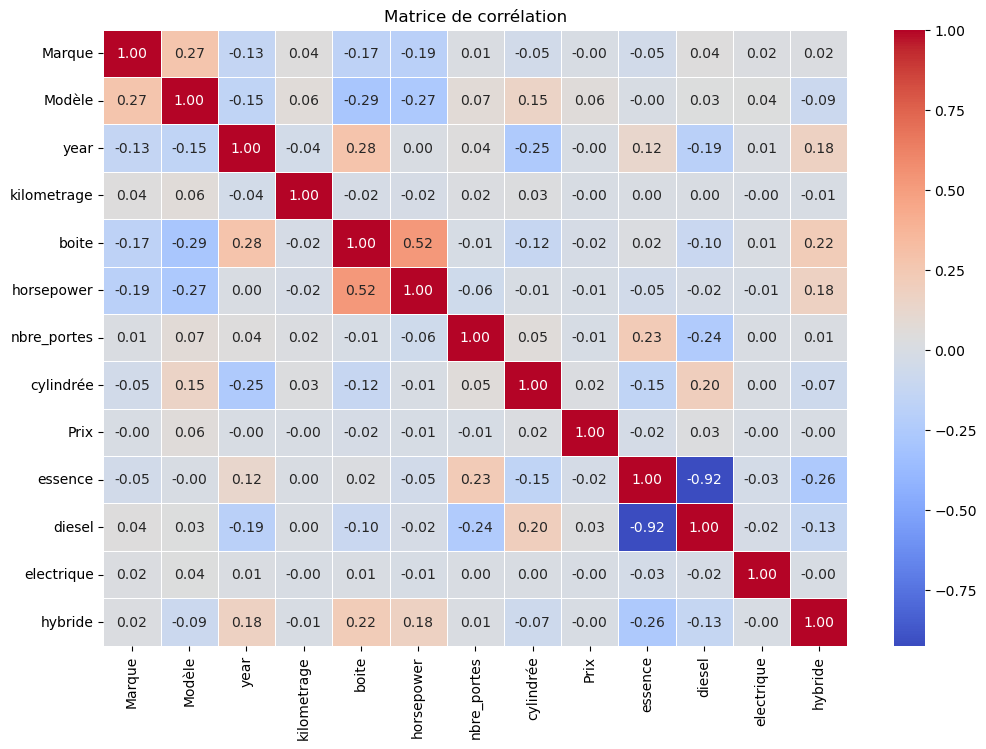

In [231]:

# 3. Calcul de la matrice de corrélation
from matplotlib import pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [232]:
# gerer les valeurs manquantes de la colonne cylindree:
train_data = df[df['cylindrée'].notna()]
test_data = df[df['cylindrée'].isna()]

X_train = train_data.drop(columns=['cylindrée'])
y_train = train_data['cylindrée']
X_test = test_data.drop(columns=['cylindrée'])

model = RandomForestRegressor()
model.fit(X_train, y_train)

df.loc[df['cylindrée'].isna(), 'cylindrée'] = model.predict(X_test)
print(df.isnull().sum())
print(df)
print(df.iloc[18])


Marque         0
Modèle         0
year           0
kilometrage    0
boite          0
horsepower     0
nbre_portes    0
cylindrée      0
Prix           0
essence        0
diesel         0
electrique     0
hybride        0
dtype: int64
          Marque    Modèle    year  kilometrage  boite  horsepower  \
0       7.024520  0.968604  2024.0          0.0      1          10   
1      10.470510  0.467602  2014.0     162000.0      0           5   
2       1.424785  0.100200  2013.0     256000.0      1           9   
3       4.241219  0.133601  2022.0      60000.0      0           7   
4       2.485089  0.033400  2020.0     162000.0      1           6   
...          ...       ...     ...          ...    ...         ...   
40194  10.470510  0.434202  2012.0     280000.0      0           9   
40195   3.180915  0.668003  2018.0     114000.0      1           8   
40196   6.163022  0.066800  2014.0      96000.0      0           8   
40197   1.192843  3.239813  2022.0      10500.0      0           5

In [233]:


scaler = StandardScaler()

df_scaled = pd.DataFrame(
    scaler.fit_transform(df), 
    columns=df.columns         
)
print(df_scaled)

        Marque    Modèle      year  kilometrage     boite  horsepower  \
0     0.515546  0.315585  1.344216    -0.028167  1.297048    0.767124   
1     1.437282 -0.284954 -0.071909    -0.024855 -0.770982   -0.595414   
2    -0.982275 -0.725349 -0.213521    -0.022933  1.297048    0.494616   
3    -0.228933 -0.685313  1.060991    -0.026940 -0.770982   -0.050399   
4    -0.698664 -0.805421  0.777766    -0.024855  1.297048   -0.322907   
...        ...       ...       ...          ...       ...         ...   
3077  1.437282 -0.324990 -0.355134    -0.022442 -0.770982    0.494616   
3078 -0.512544 -0.044738  0.494541    -0.025836  1.297048    0.222109   
3079  0.285112 -0.765385 -0.071909    -0.026204 -0.770982    0.222109   
3080 -1.044315  3.038029  1.060991    -0.027952 -0.770982   -0.595414   
3081 -0.184619 -0.605242 -1.912871    -0.022033 -0.770982   -0.867922   

      nbre_portes  cylindrée      Prix   essence    diesel  electrique  \
0       -0.684424  -0.679537 -0.014415  0.733433 

In [234]:
df.drop('electrique', axis=1, inplace=True)


In [235]:
df.to_csv('final_data.csv', index=False)
